# Visualize last Boeing B747 delivery
### Flight GTI747 from PAE (Everett) to CVG (Cincinnati) on 01/02/2023

In [5]:
%load_ext nb_black
%matplotlib inline

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [6]:
from traffic.data import opensky
from traffic.core import Traffic
from shapely.geometry import LineString
from folium import Map, PolyLine
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

### Load data from the OpenSky Network (https://opensky-network.org/) with traffic library

In [8]:
t = opensky.history(
    "2023-02-01 00:00",
    "2023-02-01 23:00",
    departure_airport="KPAE",
    arrival_airport="KCVG",
    callsign="GTI747",
)
t

Output()

,,count
icao24,callsign,
abdaa4,GTI747,21218


<IPython.core.display.Javascript object>

In [9]:
t["GTI747"].to_parquet("gti747.parquet")

<IPython.core.display.Javascript object>

### Visualize ADS-B trajectory of GTI747 flight with traffic

In [13]:
t = Traffic.from_file("gti747.parquet")
t

,,count
icao24,callsign,
abdaa4,GTI747,21218


<IPython.core.display.Javascript object>

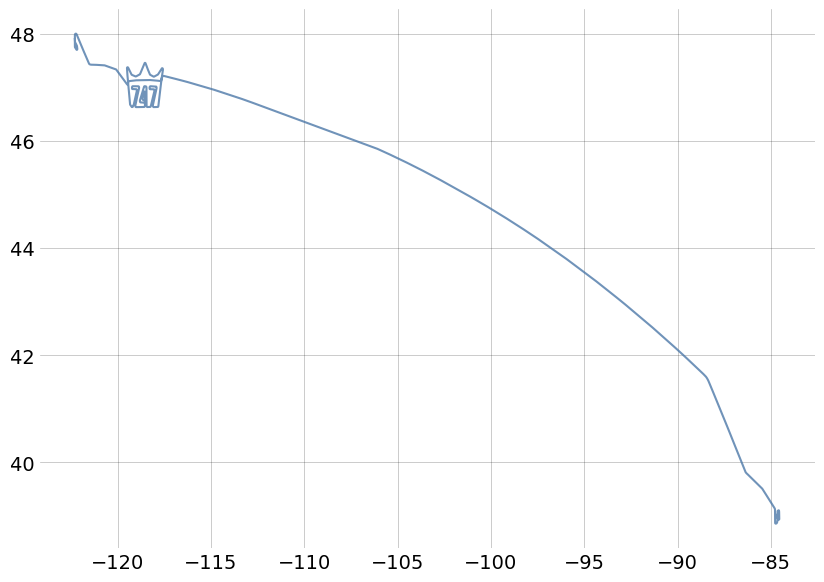

<IPython.core.display.Javascript object>

In [19]:
with plt.style.context("traffic"):
    f, ax = plt.subplots()
    t["GTI747"].plot(ax, alpha=0.8)

In [17]:
location = (47.0, -120.0)
zoom = 8
t.map_leaflet(zoom=zoom, center=location)

Map(center=[47.0, -120.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

<IPython.core.display.Javascript object>

### Visualize ADS-B trajectory of GTI747 flight with folium

In [20]:
folium_tiles = [
    "Stamen Terrain",
    "Stamen Toner",
    "Stamen Water Color",
    "cartodbpositron",
    "cartodbdark_matter",
]

<IPython.core.display.Javascript object>

In [21]:
traj = [(y, x) for x, y, z in t["GTI747"].shape.coords]
m = Map(location=(47.0, -120.0), zoom_start=8, tiles=folium_tiles[0])
PolyLine(locations=traj, color="#0039a6", weight=5.0, opacity=0.8).add_to(m)  # Boeing
m

<IPython.core.display.Javascript object>

### Visualize ADS-B position reports of GTI747 flight with geopandas and contextily

In [22]:
def traffic_to_gdf(t):
    df = t.data
    df.dropna(subset=["callsign", "latitude", "longitude"], inplace=True)
    return gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df["longitude"], df["latitude"]),
        crs="epsg:4326",  # CRS WGS 84
    )

<IPython.core.display.Javascript object>

In [23]:
gdf = traffic_to_gdf(t)
gdf.head()

,alert,altitude,callsign,day,destination,firstseen,geoaltitude,groundspeed,hour,icao24,last_position,lastseen,latitude,longitude,onground,origin,spi,squawk,timestamp,track,vertical_rate,geometry
index,,,,,,,,,,,,,,,,,,,,,,
0,False,1075.0,GTI747,2023-02-01 00:00:00+00:00,KCVG,2023-02-01 16:19:35+00:00,1100.0,156.0,2023-02-01 16:00:00+00:00,abdaa4,2023-02-01 16:19:36.284000+00:00,2023-02-01 22:37:31+00:00,47.902672,-122.285508,False,KPAE,False,None,2023-02-01 16:19:37+00:00,178.898294,5632.0,POINT (-122.28551 47.90267)
1,False,1175.0,GTI747,2023-02-01 00:00:00+00:00,KCVG,2023-02-01 16:19:35+00:00,1225.0,155.0,2023-02-01 16:00:00+00:00,abdaa4,2023-02-01 16:19:37.308000+00:00,2023-02-01 22:37:31+00:00,47.902039,-122.285454,False,KPAE,False,None,2023-02-01 16:19:38+00:00,178.891188,5504.0,POINT (-122.28545 47.90204)
2,False,1300.0,GTI747,2023-02-01 00:00:00+00:00,KCVG,2023-02-01 16:19:35+00:00,1325.0,154.0,2023-02-01 16:00:00+00:00,abdaa4,2023-02-01 16:19:38.700999936+00:00,2023-02-01 22:37:31+00:00,47.900940,-122.285454,False,KPAE,False,None,2023-02-01 16:19:39+00:00,178.883990,5312.0,POINT (-122.28545 47.90094)
3,False,1425.0,GTI747,2023-02-01 00:00:00+00:00,KCVG,2023-02-01 16:19:35+00:00,1400.0,154.0,2023-02-01 16:00:00+00:00,abdaa4,2023-02-01 16:19:39.951000064+00:00,2023-02-01 22:37:31+00:00,47.900018,-122.285438,False,KPAE,False,None,2023-02-01 16:19:40+00:00,178.883990,4992.0,POINT (-122.28544 47.90002)
4,False,1450.0,GTI747,2023-02-01 00:00:00+00:00,KCVG,2023-02-01 16:19:35+00:00,1500.0,153.0,2023-02-01 16:00:00+00:00,abdaa4,2023-02-01 16:19:40.617000192+00:00,2023-02-01 22:37:31+00:00,47.899612,-122.285385,False,KPAE,False,None,2023-02-01 16:19:41+00:00,178.876697,4736.0,POINT (-122.28539 47.89961)


<IPython.core.display.Javascript object>

In [35]:
cx.providers.CartoDB

{'Positron': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'light_all',
  'name': 'CartoDB.Positron'},
 'PositronNoLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'light_nolabels',
  'name': 'CartoDB.PositronNoLabels'},
 'PositronOnlyLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'light_only_labels',
  'name': 'CartoDB.PositronOnlyLabels'},
 'DarkMatter': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'dark_all',
  'name': 'CartoDB.DarkMatter'},
 'DarkMatterNoLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'dark_nolabels',
  'name': 'CartoDB.DarkMatterNoLabels'},
 'DarkMatterOnlyLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'dark_only_labels',
  'name': 'CartoDB.DarkMatterOnlyLabels'},
 'Voyager': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'rastertiles/voyager',
  'name': 'CartoDB.Voyager'},
 'VoyagerNoLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'rastertiles/voyager_nolabels',
  'name': 'CartoDB.VoyagerNoLabels'},
 'VoyagerOnlyLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'rastertiles/voyager_only_labels',
  'name': 'CartoDB.VoyagerOnlyLabels'},
 'VoyagerLabelsUnder': {'url': 'https://{s}.basema

<IPython.core.display.Javascript object>

In [36]:
cx_sources = [
    cx.providers.Stamen.Terrain,
    cx.providers.Stamen.TonerLite,
    cx.providers.Stamen.Watercolor,
    cx.providers.OpenStreetMap.Mapnik,
    cx.providers.OpenStreetMap.France,
    cx.providers.OpenStreetMap.HOT,
    cx.providers.CartoDB.Positron,
    cx.providers.CartoDB.DarkMatter,
    cx.providers.CartoDB.Voyager,
]

<IPython.core.display.Javascript object>

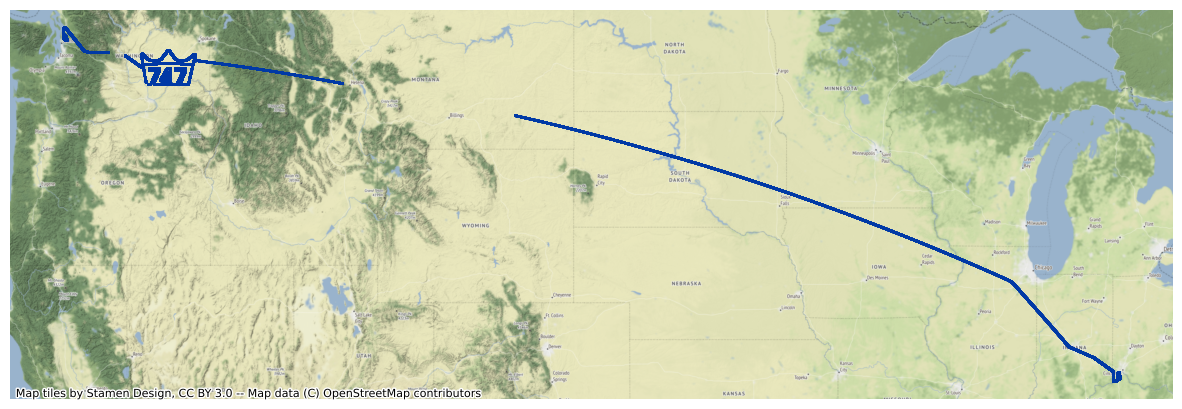

<IPython.core.display.Javascript object>

In [45]:
f, ax = plt.subplots(figsize=(15, 8))
projection = "EPSG:3857"  # Web Mercator
gdf.to_crs(projection).plot(ax=ax, color="#0039a6", marker="o", markersize=1)
ax.axis("off")
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
cx.add_basemap(ax)
plt.savefig("gti747_positions_full.png", dpi=200, bbox_inches="tight", pad_inches=0)

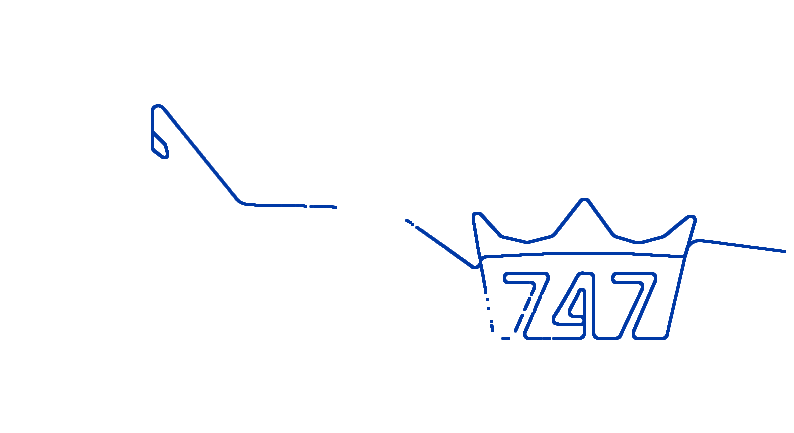

<IPython.core.display.Javascript object>

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
projection = "EPSG:3857"  # Web Mercator
gdf.to_crs(projection).plot(ax=ax, color="#0039a6", alpha=0.8, marker="o", markersize=1)
ax.set_xlim(-1.375 * 1e7, -1.3 * 1e7)
ax.set_ylim(5.8 * 1e6, 6.2 * 1e6)
ax.axis("off")
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
cx.add_basemap(ax, source=cx_sources[0], zoom=8, alpha=1.0)
plt.savefig("gti747_positions_zoom.png", dpi=200, bbox_inches="tight", pad_inches=0)